**Regrassão Linear**

Gerando um dados de aparência linear para testar a **Solução de Forma Fechada** ou **Equação Normal**

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

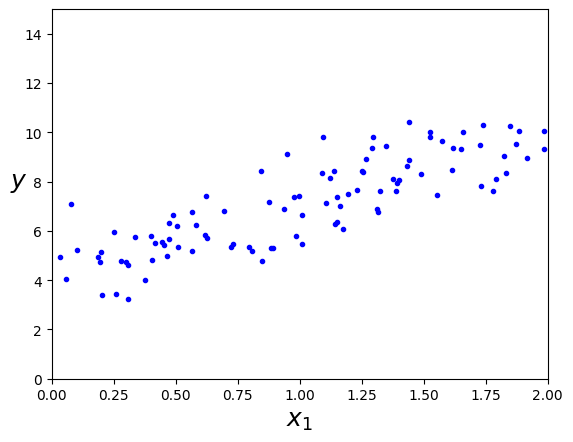

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Calculando o **θ^** usando a equação normal.

**θ = (X^T * X)⁻1 * X^T * y**

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.22155821],
       [2.86829338]])

**Destrinchando o código acima:**

np.linalg.inv(X_b.T.dot(X_b)): chamando o linalg() para poder usar a função inv() que fará a inversa da multiplicação

X_b.T.dot(X_b): Fará a multiplicação da matriz X_b transposta com a matriz X_b

(X_b.T).dot(y): multiplica a matriz transposta X_b com o vetor y

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.22155821],
       [9.95814497]])

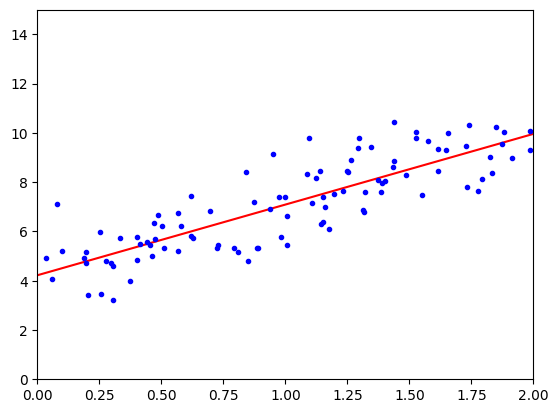

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Usando a Regressão Linear com Scikit-Learn

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.22155821]), array([[2.86829338]]))

In [7]:
lin_reg.predict(X_new)

array([[4.22155821],
       [9.95814497]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.22155821],
       [2.86829338]])

A classe LinearRegression é feita baseada na função scipy.linalg.lstsq()

Esta função calcula X+ a pseudoinversa de X, também pode ser calculada desta forma:

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.22155821],
       [2.86829338]])

É preferível usar a pseudoinversa, pois com ela é possível calcular matrizes que não são inversíveis.

**Gradiente Descendente**

In [10]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.22155821],
       [2.86829338]])

Para encontrar os melhores parâmetros podemos utilizar o GridSearch do cápitulo 2.

**Stochastic Gradient Descendent**

In [12]:
n_epochs = 50
t0, t1 = 5, 50 # learning schadule hyperparameters

def learning_schadule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # inicialização aleatória

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schadule(epoch * m + i) # learning rate
        theta = theta - eta *gradients

theta

array([[4.22330691],
       [2.88890963]])

Como é possivel ver, pelo **stochastic** funcionar de forma aleatória ele chega bem próximo do **theta do Batch**, porém fica oscilando perto do **mínimo global**

Performando uma regressão linear usando Stochastic GD com Scikit-Learn.

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.78933726]), array([3.23716037]))

**Hyperparameters:**

max_inter=1000: O modelo parará em **1000 épocas**


tol=1e-3: O modelo parará quando o **learning schadule for menor que 0.001** durante uma época


O modelo irá parar quando alguma destas exigências forém atingidas.

**Mini-Batch Gradient Descendent**

In [15]:
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

In [16]:
theta

array([[4.23384023],
       [2.84652268]])

Como é possível analisar, todos os gradientes ficam bem próximos, porém o único que realmente chega no mínimo global é o **Batch GD**, os outros apenas ficam oscilando em torno dele, mas como o **Mini-Batch GD** utiliza mini conjuntos aleatório em vez de uma instância aleatória como no **Stochastic GD**, ele acaba sendo mais preciso que o **Stochastic GD**.

**Regressão Polinomial**

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

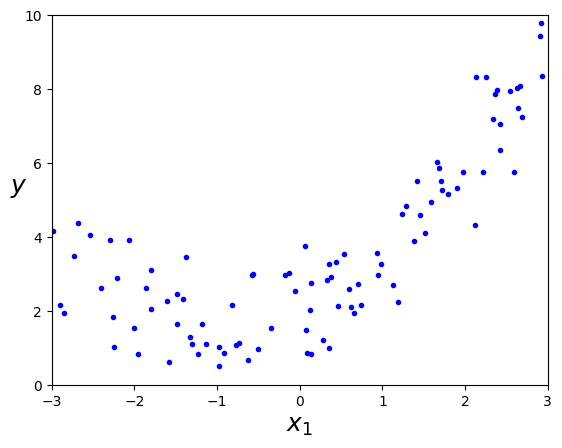

In [18]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [20]:
X[0]

array([2.38942838])

In [21]:
X_poly[0]

array([2.38942838, 5.709368  ])

**X_poly** contém o valor original de X mais o quadrado da feature

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

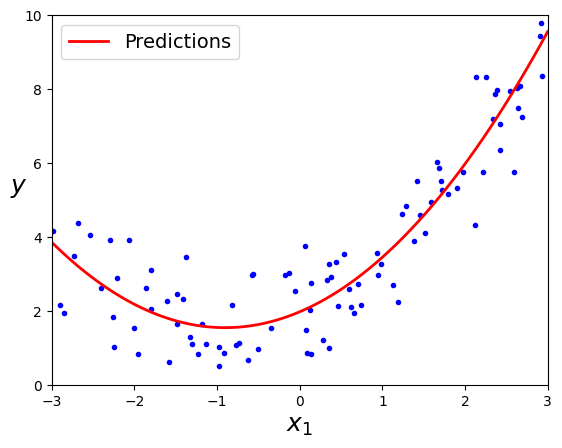

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

**Regularização de modelos lineares**

**Ridge Regression (Regularização l2)**

l2 com closed-form

In [24]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.13357033]])

l2 com Stochastic GD

In [25]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.12707461])

**Escolher entre essas abordagens (closed-form ou GD) depende do tamanho do conjunto de dados e dos requisitos de precisão e eficiência computacional.**